In [145]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
!pip install --upgrade matplotlib

In [147]:
data = pd.read_csv("Customer Churn.csv")

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [149]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",0)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [151]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [152]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [153]:
data.duplicated().sum()

0

converting the datatype of seniorcitizen from 1/0 to yes or no

In [155]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

data['SeniorCitizen'] = data['SeniorCitizen'].apply(conv)
# or we can simply use 
# data['SeniorCitizen'] = data['SeniorCitizen'].replace[{1:"Yes",0:"No"}]

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [157]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


number of churn 

[]

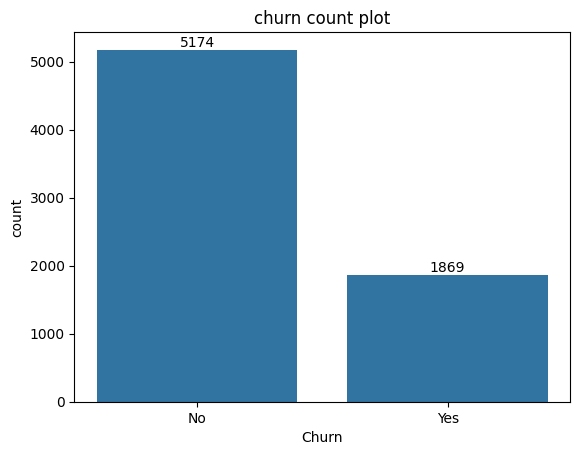

In [159]:
ax = sns.countplot(x = 'Churn', data = data)
ax.bar_label(ax.containers[0])
ax.set_title('churn count plot')
ax.plot()

percentage of customer churn

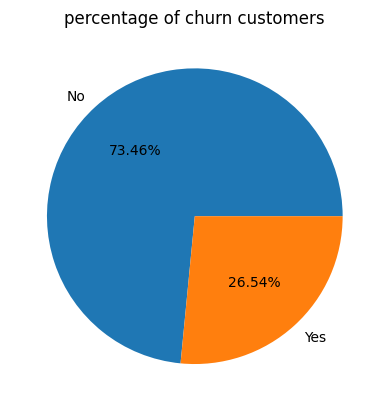

In [161]:
#plt.figure(figsize = (3,3))
gb = data.groupby('Churn').agg({"Churn":"count"})
plt.pie(gb['Churn'], labels = gb.index,autopct = "%1.2f%%")
plt.title('percentage of churn customers')
plt.show()

churn on gender basis

[]

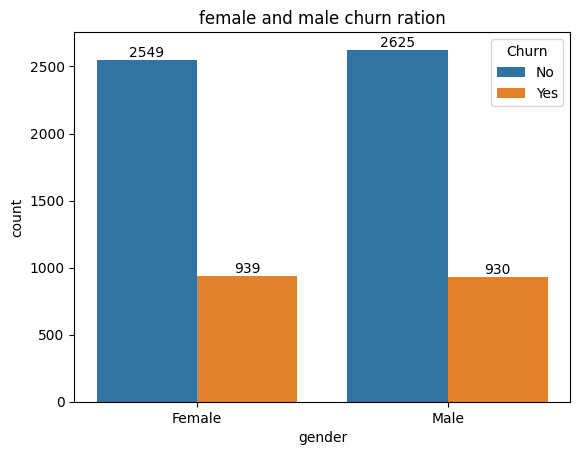

In [163]:
ax = sns.countplot(x = 'gender', data = data, hue = 'Churn')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.title('female and male churn ration')
plt.plot()

* output:-
gender is not a reason for churn

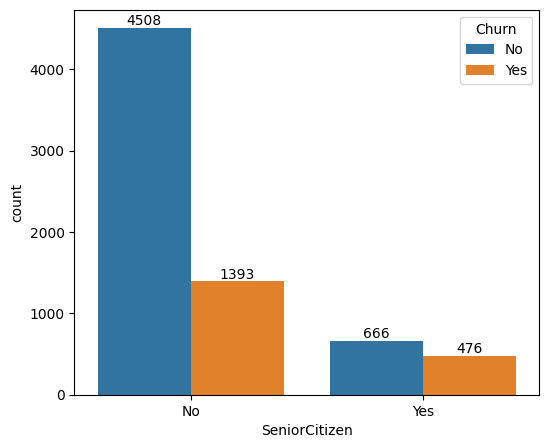

In [165]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = "SeniorCitizen", data = data, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

* outcome:
there is juge churn rate in seniorcitizen,
will analyze later the reason for their churn

Churn            No   Yes
SeniorCitizen            
No             4508  1393
Yes             666   476
Churn                 No        Yes
SeniorCitizen                      
No             76.393832  23.606168
Yes            58.318739  41.681261


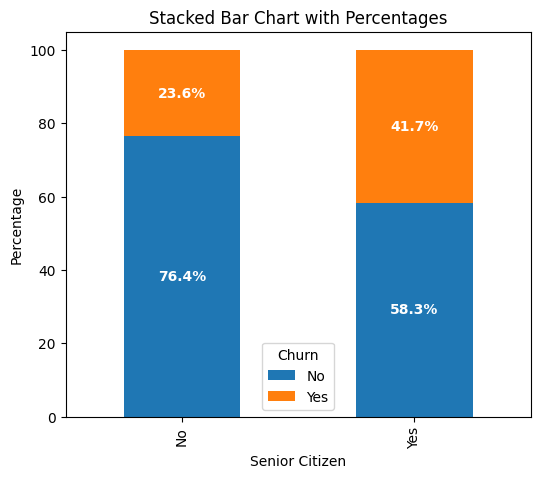

In [167]:
# Count the data for "SeniorCitizen" and "Churn"
data_counts = data.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
print(data_counts)
# Calculate the percentage of each category
data_percentage = data_counts.divide(data_counts.sum(axis=1), axis=0) * 100
print(data_percentage)
# Plot a stacked bar chart
ax = data_percentage.plot(kind='bar', stacked=True, figsize=(6, 5))

# Adding percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # avoid division by zero and empty bars
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', 
                    fontsize=10, color='white', weight='bold')

plt.title('Stacked Bar Chart with Percentages')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.show()


41.7 percent of senior citizen has stopped using the product

In [169]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


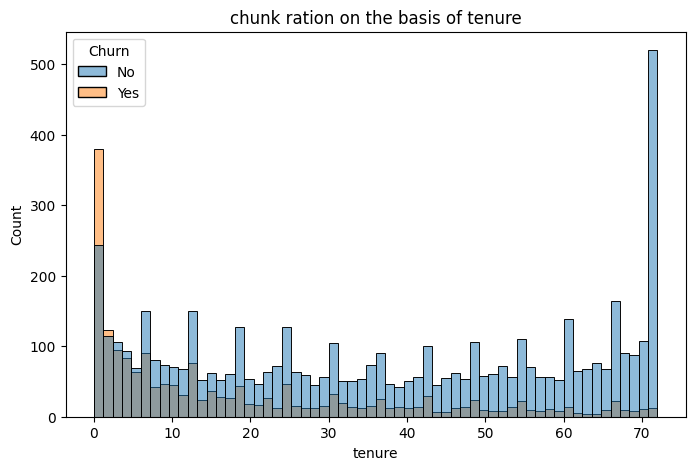

In [170]:
plt.figure(figsize = (8,5))
sns.histplot(data = data, x = 'tenure', bins = 60, hue = 'Churn')
plt.title('chunk ration on the basis of tenure')
plt.show()

* most of the people are leaving at early stage
* will find out later the reason for the people for short tenure

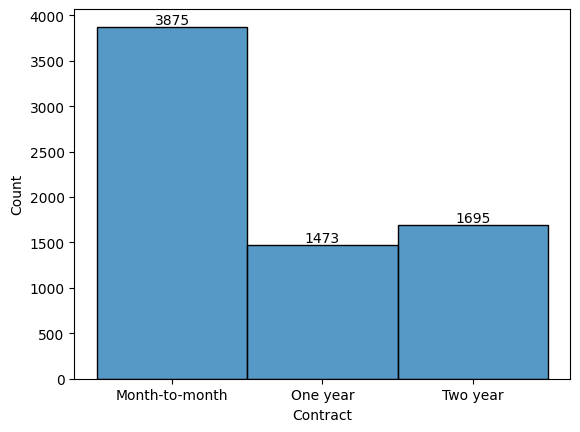

In [172]:
ax = sns.histplot(x = 'Contract',data = data)
ax.bar_label(ax.containers[0])
plt.show()

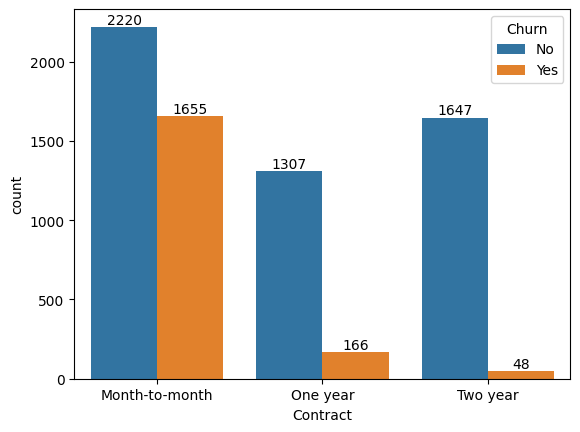

In [173]:

ax = sns.countplot(x = 'Contract',data = data,hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

* people otping one month plan churn in large ration

In [175]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

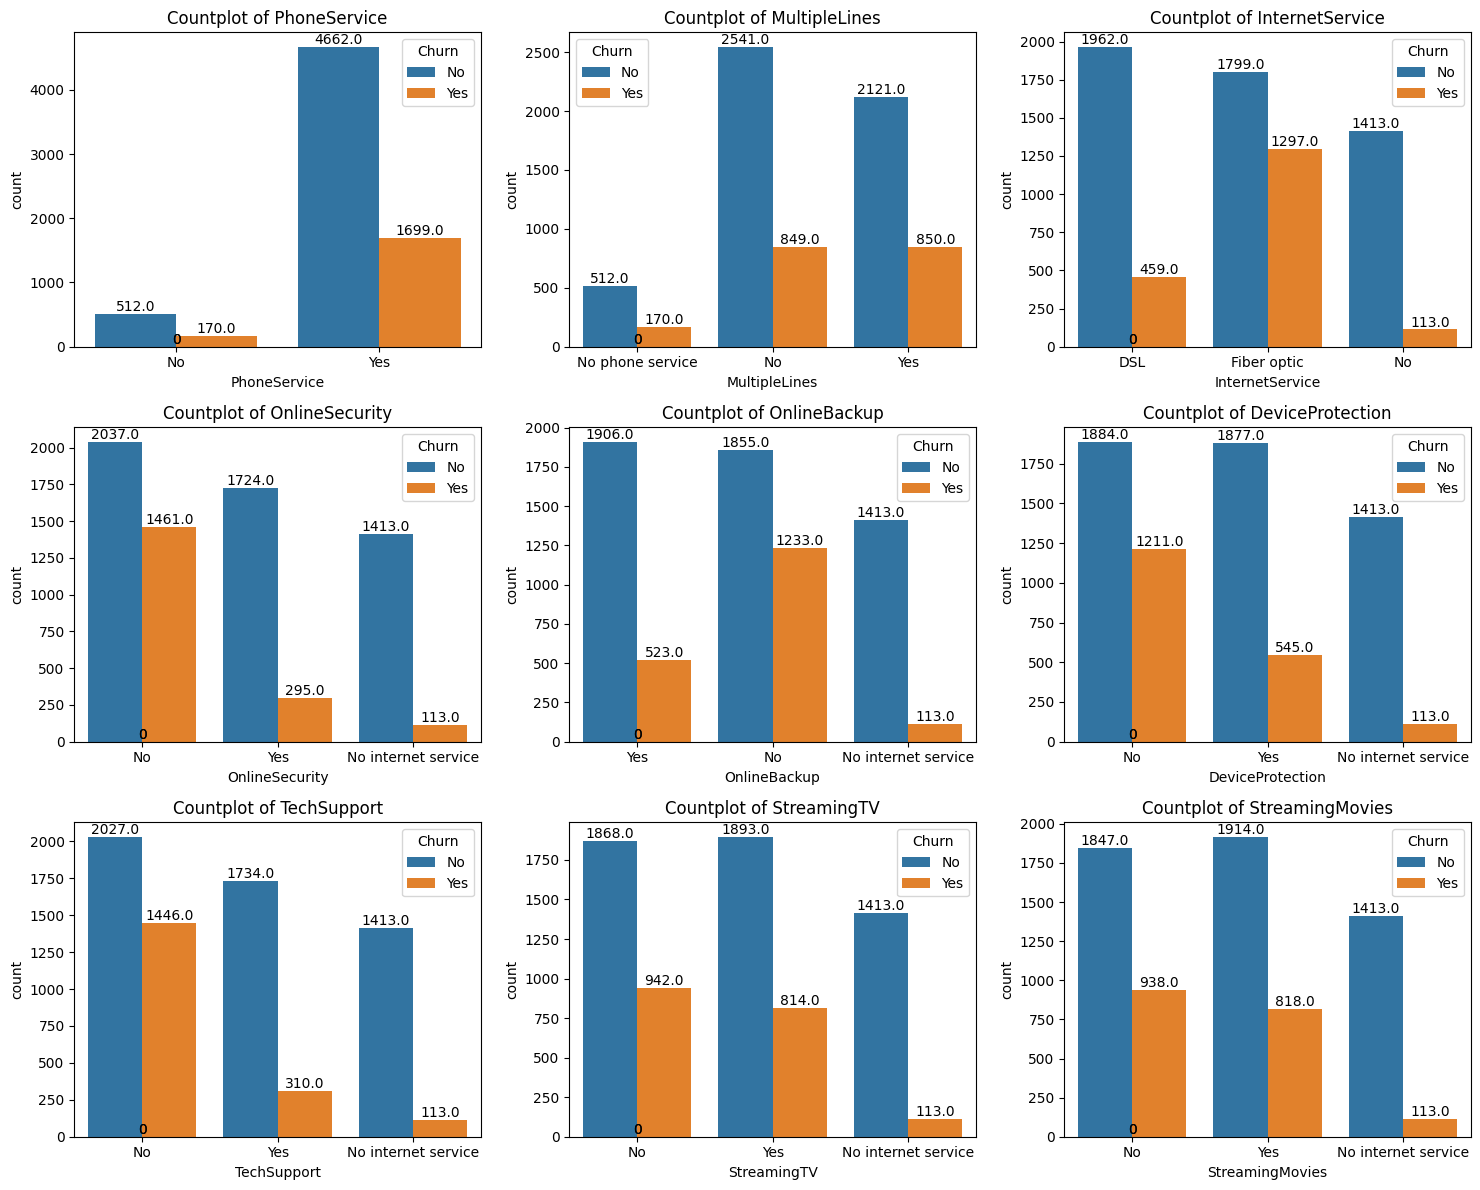

In [176]:
# # List of columns
# columns = ['PhoneService', 'MultipleLines', 'InternetService',
#            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#            'TechSupport', 'StreamingTV', 'StreamingMovies']

# # Create subplots
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Adjust grid size based on the number of columns
# axes = axes.flatten()  # Flatten the axes array for easy iteration

# # Plot each column as a countplot
# for i, column in enumerate(columns):
#     b = sns.countplot(x=column, data=data, ax=axes[i],hue = 'Churn')
#     axes[i].set_title(f'Countplot of {column}')
    
#     #axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# # Hide any unused subplots if number of columns < total subplots
# for j in range(len(columns), len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout
# plt.tight_layout()
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# List of columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Adjust grid size based on the number of columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Helper function to add count labels
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Plot each column as a countplot
for i, column in enumerate(columns):
    b = sns.countplot(x=column, data=data, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Countplot of {column}')
    add_counts(axes[i])
    #axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide any unused subplots if number of columns < total subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



** factor of churn
* not opting online security
* using fibre optics networking system
* not online backup, deviceprotection
* not taking tech support

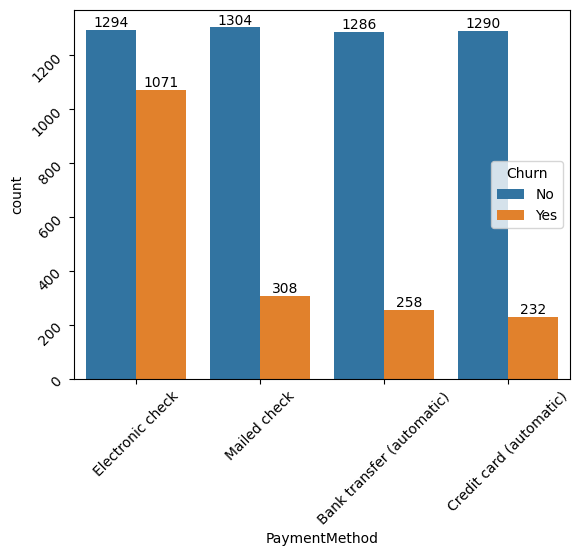

In [178]:
ax = sns.countplot(x = 'PaymentMethod', data = data, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.tick_params(rotation = 45)
plt.show()

* people opting electronic check as payment method churn rapidly

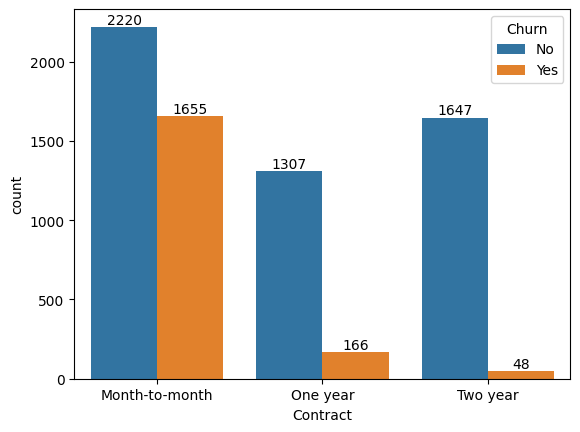

In [180]:
ax = sns.countplot(x = 'Contract', data = data, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

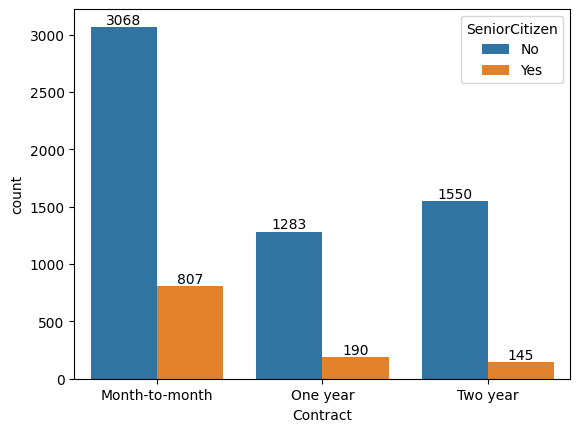

In [181]:
ax = sns.countplot(x = 'Contract', data = data, hue = 'SeniorCitizen')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

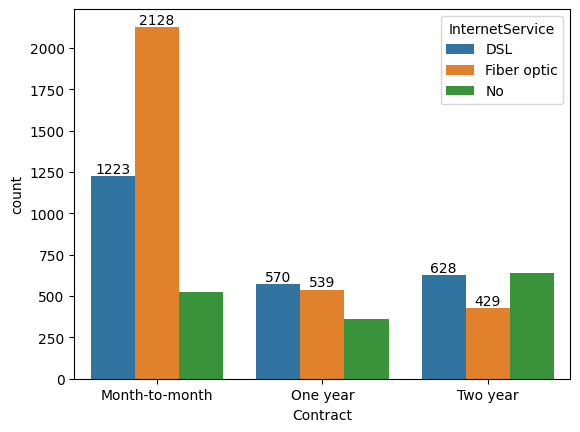

In [182]:
ax = sns.countplot(x = 'Contract', data = data , hue = 'InternetService')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

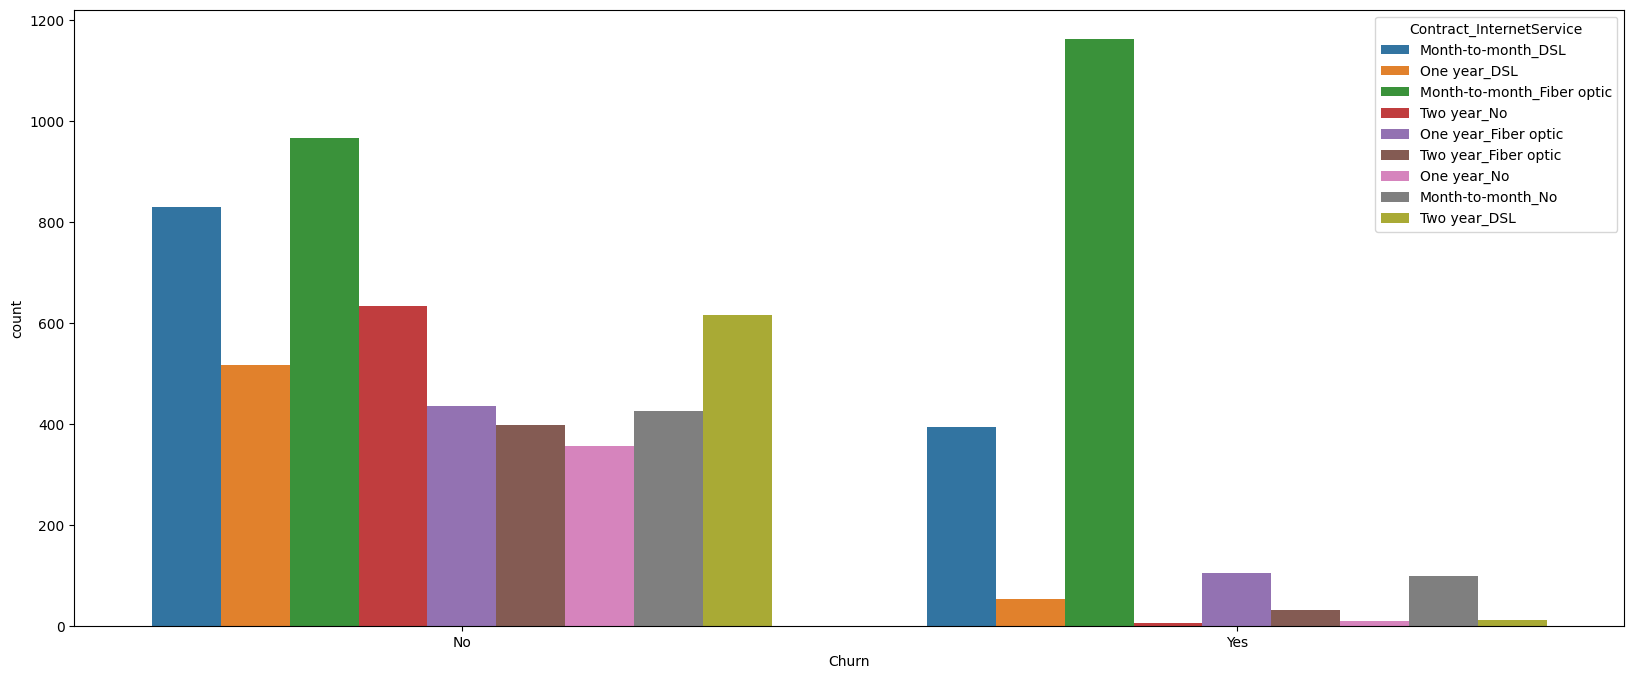

In [183]:
# Combine two categorical variables into a single new variable
data['Contract_InternetService'] = data['Contract'] + '_' + data['InternetService']
plt.figure(figsize = (20,8))
# Create countplot with the new combined variable as the hue
ax = sns.countplot(x='Churn', data=data, hue='Contract_InternetService')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# ax.bar_label(ax.containers[2])
plt.show()

* people opting month-to-month contract and use fiber optic are more likly to churn

In [220]:
import os
print(os.getcwd())

C:\Users\shiva


In [ ]:
data.info()

#   summary

* Factors Contributing to Churn
a) Customer Tenure & Churn Relationship
Customers with shorter tenure (less than 6 months) had a significantly higher churn rate compared to long-term customers.
Long-term contract customers showed a much lower churn rate.
📌 Business Implication: Customers in the early stages are at the highest risk of churn. Strategies such as personalized onboarding, better introductory offers, and proactive support can help retain them.

b) Monthly Charges & Churn
Higher monthly charges correlate with higher churn.
Many customers with lower tenure and high monthly charges tend to leave.
📌 Business Implication: Introducing flexible pricing models or discounts for high-bill customers can reduce churn.

c) Contract Type & Churn
Customers on month-to-month contracts have the highest churn rate.
Those with annual or two-year contracts show significantly lower churn rates.
📌 Business Implication: Encouraging long-term contracts through incentives and discounts can enhance customer retention.

d) Payment Method & Churn
Customers using electronic checks have the highest churn rate compared to those using credit cards or bank transfers.
📌 Business Implication: Investigate electronic check users’ concerns and promote more reliable payment methods.

4. Actionable Recommendations
✅ Improve Customer Retention in Early Stages:

Offer better onboarding experiences, discounts, and personalized services for new customers.
✅ Introduce Loyalty Programs:
Encourage long-term contracts by providing incentives like discounts or free add-ons.
✅ Revise Pricing Strategies:
Consider flexible or customized plans for high-spending customers.
✅ Address Payment Method Concerns:
Provide more seamless and reliable payment options to reduce churn related to payment failures.
